# 数据来源：某企业销售的6种商品所对应的送货及用户反馈数据
# 解决问题：
## 1、配送服务是否存在问题
## 2、是否存在尚有潜力的销售区域
## 3、商品是否存在质量问题

# 分析过程如下
## 一、数据清洗
### ① 重复值、缺失值、格式调整
### ② 异常值处理（比如：销售金额存在等于0的，数量和销售金额的标准差都在均值的8倍以上等）
## 二、数据规整
### 比如：增加一项辅助列：月份
## 三、数据分析并可视化

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
plt.rcParams['font.sans-serif'] = 'SimHei' ## 设置中文显示

## 一、数据清洗
### ① 重复值、缺失值、格式调整

In [9]:
data123 = pd.read_csv('data_wuliu.csv',encoding='gbk')
data123

,订单号,订单行,销售时间,交货时间,货品交货状况,货品,货品用户反馈,销售区域,数量,销售金额
0,P096311,10,2016-7-30,2016-9-30,晚交货,货品3,质量合格,华北,2.0,"1052,75元"
1,P096826,10,2016-8-30,2016-10-30,按时交货,货品3,质量合格,华北,10.0,"11,50万元"
2,NaN,20,2016-8-30,2016-10-30,按时交货,货品3,质量合格,华北,10.0,"11,50万元"
3,P097435,10,2016-7-30,2016-9-30,按时交货,货品1,返修,华南,2.0,"6858,77元"
4,P097446,60,2016-11-26,2017-1-26,晚交货,货品3,质量合格,华北,15.0,"129,58元"
...,...,...,...,...,...,...,...,...,...,...
1156,P299901,10,2016-12-15,2017-3-15,按时交货,货品6,质量合格,马来西亚,2.0,"200,41元"
1157,P302956,10,2016-12-22,2017-3-22,按时交货,货品2,拒货,华东,20.0,"79,44元"
1158,P303801,10,2016-12-15,2017-3-15,按时交货,货品2,质量合格,华东,1.0,"194,08元"
1159,P307276,10,2016-12-22,2017-3-22,按时交货,货品6,质量合格,马来西亚,1.0,"32,18元"


In [2]:
data = pd.read_csv('data_wuliu.csv',encoding='gbk')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1161 entries, 0 to 1160
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   订单号     1159 non-null   object 
 1   订单行     1161 non-null   int64  
 2   销售时间    1161 non-null   object 
 3   交货时间    1161 non-null   object 
 4   货品交货状况  1159 non-null   object 
 5   货品      1161 non-null   object 
 6   货品用户反馈  1161 non-null   object 
 7   销售区域    1161 non-null   object 
 8   数量      1157 non-null   float64
 9   销售金额    1161 non-null   object 
dtypes: float64(1), int64(1), object(8)
memory usage: 90.8+ KB


#### 通过info()可以看出，包括10列数据，名字，数据量，格式等，可以得出：
1. 订单号，货品交货情况，数量：存在缺失值，但是确实量不大，可以删除
2. 订单行，对分析无关紧要，可以考虑删除
3. 销售金额格式不对（万元|元，逗号问题）,数据类型需要转换成int|float

In [3]:
#删除重复记录
data.drop_duplicates(keep='first',inplace=True) #keep='first'默认值，保留第一次出现的重复记录
#删除缺失值（na,删除待有na的整行数据,axis=0,how='any'默认值）
data.dropna(axis=0,how='any',inplace=True) # how='any'只要有一个na就删除整行数据
#删除订单行(重复运行会报错，因为第一次已经删除了订单行这一列)
data.drop(columns=['订单行'],inplace=True,axis=1) #axis=1表示删除列
print(data.info())
#更新索引(drop=True:把原来的索引index列删除，重置index)
data.reset_index(drop=True,inplace=True)

<class 'pandas.core.frame.DataFrame'>
Index: 1146 entries, 0 to 1160
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   订单号     1146 non-null   object 
 1   销售时间    1146 non-null   object 
 2   交货时间    1146 non-null   object 
 3   货品交货状况  1146 non-null   object 
 4   货品      1146 non-null   object 
 5   货品用户反馈  1146 non-null   object 
 6   销售区域    1146 non-null   object 
 7   数量      1146 non-null   float64
 8   销售金额    1146 non-null   object 
dtypes: float64(1), object(8)
memory usage: 89.5+ KB
None


In [4]:
#取出销售金额列，对每一个数据进行清洗
#编写自定义过滤函数：删除逗号，转成float，如果是万元则*10000，否则，删除元

In [4]:
def data_deal(number):
    if number.find('万元')!= -1:#找到带有万元的，取出数字，去掉逗号，转成float，*10000
        number_new = float(number[:number.find('万元')].replace(',',''))*10000
        pass
    else: #找到带有元的，删除元，删除逗号，转成float
        number_new = float(number.replace('元','').replace(',',''))
        pass
    return number_new
data['销售金额'] = data['销售金额'].map(data_deal)
data

,订单号,销售时间,交货时间,货品交货状况,货品,货品用户反馈,销售区域,数量,销售金额
0,P096311,2016-7-30,2016-9-30,晚交货,货品3,质量合格,华北,2.0,105275.0
1,P096826,2016-8-30,2016-10-30,按时交货,货品3,质量合格,华北,10.0,11500000.0
2,P097435,2016-7-30,2016-9-30,按时交货,货品1,返修,华南,2.0,685877.0
3,P097446,2016-11-26,2017-1-26,晚交货,货品3,质量合格,华北,15.0,12958.0
4,P097446,2016-11-26,2017-1-26,晚交货,货品3,拒货,华北,15.0,3239.0
...,...,...,...,...,...,...,...,...,...
1141,P299901,2016-12-15,2017-3-15,按时交货,货品6,质量合格,马来西亚,2.0,20041.0
1142,P302956,2016-12-22,2017-3-22,按时交货,货品2,拒货,华东,20.0,7944.0
1143,P303801,2016-12-15,2017-3-15,按时交货,货品2,质量合格,华东,1.0,19408.0
1144,P307276,2016-12-22,2017-3-22,按时交货,货品6,质量合格,马来西亚,1.0,3218.0


### ② 异常值处理

In [5]:
print(data.describe())

                 数量          销售金额
count   1146.000000  1.146000e+03
mean      76.069372  1.223488e+05
std      589.416486  1.114599e+06
min        1.000000  0.000000e+00
25%        1.000000  2.941500e+03
50%        1.000000  9.476500e+03
75%        4.000000  3.576775e+04
max    11500.000000  3.270000e+07


#### 1.销售金额为0的情况，删除
#### 2.产生严重的数据右偏情况（电商领域的2/8法则很正常。）

In [6]:
data = data[data['销售金额']!=0]
data

,订单号,销售时间,交货时间,货品交货状况,货品,货品用户反馈,销售区域,数量,销售金额
0,P096311,2016-7-30,2016-9-30,晚交货,货品3,质量合格,华北,2.0,105275.0
1,P096826,2016-8-30,2016-10-30,按时交货,货品3,质量合格,华北,10.0,11500000.0
2,P097435,2016-7-30,2016-9-30,按时交货,货品1,返修,华南,2.0,685877.0
3,P097446,2016-11-26,2017-1-26,晚交货,货品3,质量合格,华北,15.0,12958.0
4,P097446,2016-11-26,2017-1-26,晚交货,货品3,拒货,华北,15.0,3239.0
...,...,...,...,...,...,...,...,...,...
1141,P299901,2016-12-15,2017-3-15,按时交货,货品6,质量合格,马来西亚,2.0,20041.0
1142,P302956,2016-12-22,2017-3-22,按时交货,货品2,拒货,华东,20.0,7944.0
1143,P303801,2016-12-15,2017-3-15,按时交货,货品2,质量合格,华东,1.0,19408.0
1144,P307276,2016-12-22,2017-3-22,按时交货,货品6,质量合格,马来西亚,1.0,3218.0


## 二、数据规整

In [7]:
data['销售时间'] = pd.to_datetime(data['销售时间'])
data['交货时间'] = pd.to_datetime(data['交货时间'])

data['销售月份'] = data['销售时间'].dt.month
data['交货月份'] = data['交货时间'].dt.month
data.head()

C:\Users\LWY520\AppData\Local\Temp\ipykernel_35152\2397356816.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['销售时间'] = pd.to_datetime(data['销售时间'])
C:\Users\LWY520\AppData\Local\Temp\ipykernel_35152\2397356816.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['交货时间'] = pd.to_datetime(data['交货时间'])
C:\Users\LWY520\AppData\Local\Temp\ipykernel_35152\2397356816.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

,订单号,销售时间,交货时间,货品交货状况,货品,货品用户反馈,销售区域,数量,销售金额,销售月份,交货月份
0,P096311,2016-07-30,2016-09-30,晚交货,货品3,质量合格,华北,2.0,105275.0,7,9
1,P096826,2016-08-30,2016-10-30,按时交货,货品3,质量合格,华北,10.0,11500000.0,8,10
2,P097435,2016-07-30,2016-09-30,按时交货,货品1,返修,华南,2.0,685877.0,7,9
3,P097446,2016-11-26,2017-01-26,晚交货,货品3,质量合格,华北,15.0,12958.0,11,1
4,P097446,2016-11-26,2017-01-26,晚交货,货品3,拒货,华北,15.0,3239.0,11,1


## 各销售地区的销售金额排名

In [8]:
data.groupby(['销售区域']).sum(["销售金额"])

,数量,销售金额,销售月份,交货月份
销售区域,,,,
华东,53811.0,29319629.0,2907,2077
华北,11900.5,63432275.0,2339,1916
华南,579.0,24552774.0,100,89
泰国,5733.0,3036526.0,1740,1577
西北,5240.0,12706615.0,576,461
马来西亚,9911.0,7163935.0,2999,2635


## 各货品销售金额排名

In [8]:
sum(data['销售金额'])

140211754.0

In [11]:
data.groupby(['货品']).sum(["销售金额"])

,数量,销售金额,销售月份,交货月份
货品,,,,
货品1,3417.0,46215058.0,272,222
货品2,55321.0,30536679.0,3002,2148
货品3,9073.5,52054632.0,2197,1806
货品4,5229.0,2421974.0,546,438
货品5,5733.0,3036526.0,1740,1577
货品6,8401.0,5946885.0,2904,2564


## 三、数据分析并可视化
### 1、配送服务是否存在问题
#### a.月份维度

In [9]:
data['货品交货状况'] = data['货品交货状况'].str.strip() #去掉空格
data1 = data.groupby(['销售月份','货品交货状况']).size().unstack() #unstack()把行索引变成列索引
data1['按时交货率'] = data1['按时交货']/(data1['按时交货']+data1['晚交货'])
data1
#从按时交货率来看，第四季度低于第三季度，猜测可能是气候原因造成

C:\Users\LWY520\AppData\Local\Temp\ipykernel_8668\3816806701.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['货品交货状况'] = data['货品交货状况'].str.strip() #去掉空格


货品交货状况,按时交货,晚交货,按时交货率
销售月份,,,
7,189,13,0.935644
8,218,35,0.861660
9,122,9,0.931298
10,238,31,0.884758
11,101,25,0.801587
12,146,18,0.890244


#### b.销售区域维度

In [10]:
data1 = data.groupby(['销售区域','货品交货状况']).size().unstack()
data1['按时交货率'] = data1['按时交货']/(data1['按时交货']+data1['晚交货'])
data1 = data1.sort_values(data1.columns[-1],ascending=False)
data1

货品交货状况,按时交货,晚交货,按时交货率
销售区域,,,
泰国,183,4,0.978610
马来西亚,310,16,0.950920
华南,10,1,0.909091
华北,226,27,0.893281
华东,268,39,0.872964
西北,17,44,0.278689


泰国地区的按时交货率最高，西北地区的按时交货率最低，而且非常明显，可以看出，西北地区的配送服务存在问题，需要重点关注

#### c.货品维度

In [11]:
data1 = data.groupby(['货品','货品交货状况']).size().unstack()
data1['按时交货率'] = data1['按时交货']/(data1['按时交货']+data1['晚交货'])
data1 = data1.sort_values(data1.columns[-1],ascending=False)
data1

货品交货状况,按时交货,晚交货,按时交货率
货品,,,
货品5,183,4,0.978610
货品6,309,7,0.977848
货品1,27,2,0.931034
货品3,212,26,0.890756
货品2,269,48,0.848580
货品4,14,44,0.241379


可以看出货品4的按时交货率最低

#### d.货品和销售区域结合

In [12]:
data1 = data.groupby(['货品','销售区域','货品交货状况']).size().unstack()
data1['按时交货率'] = data1['按时交货']/(data1['按时交货']+data1['晚交货'])
data1 = data1.sort_values(data1.columns[-1],ascending=False)
data1
#销售区域：最差在西北地区，货品有1和4，主要是货品4送过较晚导致
#货品：最差的货品2，主要送往华东和马来西亚，主要是马来西亚的送货较晚导致。

货品交货状况     按时交货   晚交货     按时交货率
货品  销售区域                       
货品5 泰国    183.0   4.0  0.978610
货品6 马来西亚  309.0   7.0  0.977848
货品1 华北     14.0   1.0  0.933333
    华南     10.0   1.0  0.909091
货品3 华北    212.0  26.0  0.890756
货品2 华东    268.0  39.0  0.872964
货品4 西北     14.0  44.0  0.241379
货品2 马来西亚    1.0   9.0  0.100000
货品1 西北      3.0   NaN       NaN

## 2.是否存在尚有潜力的销售区域

### a. 月份维度

In [13]:
data_month = data.groupby(['销售月份','货品'])['数量'].sum().unstack()
data_month

货品,货品1,货品2,货品3,货品4,货品5,货品6
销售月份,,,,,,
7,283.0,491.0,2041.5,414.0,733.0,1649.0
8,1413.0,3143.0,1045.0,1188.0,2381.0,1181.0
9,1693.0,3020.0,2031.0,NaN,271.0,343.0
10,4.0,28420.0,1684.0,2542.0,1984.0,2358.0
11,20.0,2042.0,100.0,3.0,14.0,383.0
12,4.0,18205.0,2172.0,1082.0,350.0,2487.0


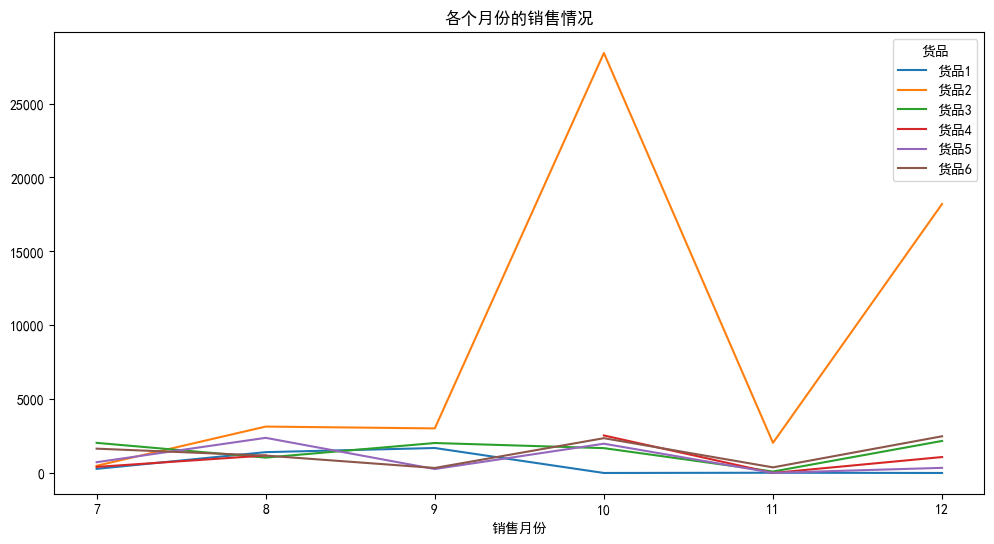

In [14]:
# 绘制各个月份的销售情况
data_month.plot(kind='line',figsize=(12,6))
plt.title('各个月份的销售情况')
plt.show()

货品2在10月和12月销量猛增，有可能是公司加大了营销力度，也有可能是开发了新的市场

### b. 销售区域维度

In [15]:
data_region = data.groupby(['销售区域','货品'])['数量'].sum().unstack()
data_region

货品,货品1,货品2,货品3,货品4,货品5,货品6
销售区域,,,,,,
华东,NaN,53811.0,NaN,NaN,NaN,NaN
华北,2827.0,NaN,9073.5,NaN,NaN,NaN
华南,579.0,NaN,NaN,NaN,NaN,NaN
泰国,NaN,NaN,NaN,NaN,5733.0,NaN
西北,11.0,NaN,NaN,5229.0,NaN,NaN
马来西亚,NaN,1510.0,NaN,NaN,NaN,8401.0


从销售区域看，每种货品销售区域为1-3个，货品1有三个销售区域，货品2有两个销售区域，货品3、4、5、6只有一个销售区域，货品2在华东地区还有较大市场空间，适合加大投入，同时货品2在西北配送时效长，用户拒收率高，从成本角度考虑，应该减少投入

### c. 月份和区域结合

In [16]:
data_month_region = data.groupby(['销售月份','销售区域','货品'])['数量'].sum().unstack()
data_month_region

货品            货品1      货品2     货品3     货品4     货品5     货品6
销售月份 销售区域                                                 
7    华东       NaN    489.0     NaN     NaN     NaN     NaN
     华北       1.0      NaN  2041.5     NaN     NaN     NaN
     华南     282.0      NaN     NaN     NaN     NaN     NaN
     泰国       NaN      NaN     NaN     NaN   733.0     NaN
     西北       NaN      NaN     NaN   414.0     NaN     NaN
     马来西亚     NaN      2.0     NaN     NaN     NaN  1649.0
8    华东       NaN   1640.0     NaN     NaN     NaN     NaN
     华北    1410.0      NaN  1045.0     NaN     NaN     NaN
     华南       3.0      NaN     NaN     NaN     NaN     NaN
     泰国       NaN      NaN     NaN     NaN  2381.0     NaN
     西北       NaN      NaN     NaN  1188.0     NaN     NaN
     马来西亚     NaN   1503.0     NaN     NaN     NaN  1181.0
9    华东       NaN   3019.0     NaN     NaN     NaN     NaN
     华北    1409.0      NaN  2031.0     NaN     NaN     NaN
     华南     283.0      NaN     NaN     NaN     NaN     NaN
     泰国       NaN      NaN     NaN     NaN   271.0     NaN
     西北       1.0      NaN     NaN     NaN     NaN     NaN
     马来西亚     NaN      1.0     NaN     NaN     NaN   343.0
10   华东       NaN  28420.0     NaN     NaN     NaN     NaN
     华北       3.0      NaN  1684.0     NaN     NaN     NaN
     泰国       NaN      NaN     NaN     NaN  1984.0     NaN
     西北       1.0      NaN     NaN  2542.0     NaN     NaN
     马来西亚     NaN      NaN     NaN     NaN     NaN  2358.0
11   华东       NaN   2041.0     NaN     NaN     NaN     NaN
     华北       2.0      NaN   100.0     NaN     NaN     NaN
     华南       9.0      NaN     NaN     NaN     NaN     NaN
     泰国       NaN      NaN     NaN     NaN    14.0     NaN
     西北       9.0      NaN     NaN     3.0     NaN     NaN
     马来西亚     NaN      1.0     NaN     NaN     NaN   383.0
12   华东       NaN  18202.0     NaN     NaN     NaN     NaN
     华北       2.0      NaN  2172.0     NaN     NaN     NaN
     华南       2.0      NaN     NaN     NaN     NaN     NaN
     泰国       NaN      NaN     NaN     NaN   350.0     NaN
     西北       NaN      NaN     NaN  1082.0     NaN     NaN
     马来西亚     NaN      3.0     NaN     NaN     NaN  2487.0

货品2没有开发新的市场，而是在华东地区加大了营销力度
可以在7，8，9月份加大华东地区的营销力度

## 3.商品是否存在质量问题

In [17]:
data['货品用户反馈'] = data['货品用户反馈'].str.strip()
data3 = data.groupby(['货品','销售区域'])['货品用户反馈'].value_counts().unstack()
data3['拒货率'] = data3['拒货']/data3.sum(axis=1)
data3['合格率'] = data3['质量合格']/data3.sum(axis=1)
data3['返修率'] = data3['返修']/data3.sum(axis=1)
data3.sort_values(['合格率','返修率','拒货率'],ascending=False)

C:\Users\LWY520\AppData\Local\Temp\ipykernel_8668\3692354837.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['货品用户反馈'] = data['货品用户反馈'].str.strip()


货品用户反馈      拒货   质量合格    返修       拒货率       合格率       返修率
货品  销售区域                                                 
货品3 华北    31.0  188.0  19.0  0.130252  0.789484  0.079525
货品6 马来西亚  56.0  246.0  14.0  0.177215  0.778045  0.044170
货品5 泰国    14.0  144.0  29.0  0.074866  0.769745  0.154383
货品2 华东    72.0  184.0  51.0  0.234528  0.598891  0.165674
货品1 华南     5.0    4.0   2.0  0.454545  0.349206  0.169438
    西北     NaN    1.0   2.0       NaN  0.333333  0.600000
    华北     NaN    3.0  12.0       NaN  0.200000  0.789474
货品4 西北     NaN    9.0  49.0       NaN  0.155172  0.842573
货品2 马来西亚   6.0    1.0   3.0  0.600000  0.094340  0.280522

货品3 6 5 的合格率较高，返修率较低，货品1 2 4 的合格率较低，返修率较高，货品1、2、4质量存在问题，建议扩大抽检范围，增大质检力度
货品2在马来西亚的拒货率最高，按时交货率最低，猜测马来西亚对时效性要求较高，需要提高时效性。货品2在马来西亚的销售量较低，可以考虑减少投入。

## 货品2的7-12月中每日销售量

In [20]:
data['销售日'] = data['销售时间'].dt.day
data.head()

C:\Users\LWY520\AppData\Local\Temp\ipykernel_8668\3895157690.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['销售日'] = data['销售时间'].dt.day


,订单号,销售时间,交货时间,货品交货状况,货品,货品用户反馈,销售区域,数量,销售金额,销售月份,交货月份,销售日
0,P096311,2016-07-30,2016-09-30,晚交货,货品3,质量合格,华北,2.0,105275.0,7,9,30
1,P096826,2016-08-30,2016-10-30,按时交货,货品3,质量合格,华北,10.0,11500000.0,8,10,30
2,P097435,2016-07-30,2016-09-30,按时交货,货品1,返修,华南,2.0,685877.0,7,9,30
3,P097446,2016-11-26,2017-01-26,晚交货,货品3,质量合格,华北,15.0,12958.0,11,1,26
4,P097446,2016-11-26,2017-01-26,晚交货,货品3,拒货,华北,15.0,3239.0,11,1,26


In [22]:
data_goods2 = data[data['货品']=='货品2']
data_goods2

,订单号,销售时间,交货时间,货品交货状况,货品,货品用户反馈,销售区域,数量,销售金额,销售月份,交货月份,销售日
5,P098065,2016-07-15,2016-10-15,按时交货,货品2,返修,华东,1.0,2219297.0,7,10,15
9,P109038,2016-12-30,2017-02-28,晚交货,货品2,返修,马来西亚,1.0,291061.0,12,2,30
10,P109038,2016-12-30,2017-02-28,晚交货,货品2,质量合格,马来西亚,1.0,291061.0,12,2,30
16,P112481,2016-09-12,2016-12-12,晚交货,货品2,拒货,马来西亚,1.0,114053.0,9,12,12
17,P112700,2016-07-30,2016-09-30,按时交货,货品2,拒货,马来西亚,2.0,4419.0,7,9,30
...,...,...,...,...,...,...,...,...,...,...,...,...
1139,P299789,2016-12-14,2017-03-14,按时交货,货品2,质量合格,华东,1.0,2605.0,12,3,14
1140,P299791,2016-12-09,2017-03-09,按时交货,货品2,质量合格,华东,3.0,29744.0,12,3,9
1142,P302956,2016-12-22,2017-03-22,按时交货,货品2,拒货,华东,20.0,7944.0,12,3,22
1143,P303801,2016-12-15,2017-03-15,按时交货,货品2,质量合格,华东,1.0,19408.0,12,3,15


In [24]:
data_goods_2 = data_goods2.sort_values(by='销售时间', ascending=True)
data_goods_2

,订单号,销售时间,交货时间,货品交货状况,货品,货品用户反馈,销售区域,数量,销售金额,销售月份,交货月份,销售日
281,P195347,2016-07-01,2016-10-01,按时交货,货品2,质量合格,华东,2.0,518.0,7,10,1
282,P195347,2016-07-01,2016-10-01,按时交货,货品2,质量合格,华东,2.0,563.0,7,10,1
386,P206613,2016-07-04,2016-10-04,按时交货,货品2,质量合格,华东,1.0,15606.0,7,10,4
385,P206613,2016-07-04,2016-10-04,按时交货,货品2,质量合格,华东,1.0,6574.0,7,10,4
298,P197591,2016-07-07,2016-10-07,按时交货,货品2,质量合格,华东,10.0,4430.0,7,10,7
...,...,...,...,...,...,...,...,...,...,...,...,...
9,P109038,2016-12-30,2017-02-28,晚交货,货品2,返修,马来西亚,1.0,291061.0,12,2,30
517,P216538,2016-12-30,2017-02-28,按时交货,货品2,返修,华东,30.0,4607.0,12,2,30
10,P109038,2016-12-30,2017-02-28,晚交货,货品2,质量合格,马来西亚,1.0,291061.0,12,2,30
1086,P283088,2016-12-30,2017-02-28,按时交货,货品2,质量合格,华东,1.0,73865.0,12,2,30


In [26]:
data_goods_2['销售月份']

281      7
282      7
386      7
385      7
298      7
        ..
9       12
517     12
10      12
1086    12
1067    12
Name: 销售月份, Length: 317, dtype: int32

In [28]:
data_goods_2.to_excel(r"货品2.xlsx")

In [1]:
import pandas as pd

# Load the Excel file
file_path = r'货品2.xlsx'
data = pd.read_excel(file_path)

# Extract the relevant columns
months = data['销售月份'].unique().tolist()
days = data['销售日'].unique().tolist()
data_list = data[['销售月份', '销售日', '数量']].values.tolist()

# Transform the data into the required format for ECharts
processed_data = [[months.index(row[0]), days.index(row[1]), row[2]] for row in data_list]

# Save the processed data to a JavaScript file
with open('processed_data.js', 'w', encoding='utf-8') as f:
    f.write(f'var months = {months};\n')
    f.write(f'var days = {days};\n')
    f.write(f'var data = {processed_data};\n')
